In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import re
pd.options.mode.use_inf_as_na = True
pd.set_option('display.float_format',lambda x:'%.2f' % x)
# matplotlib其实是不支持显示中文的 显示中文需要一行代码设置字体
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）
plt.style.use('fivethirtyeight')

# 分析维度调用

In [2]:
# 剩余本金分析
def Remaining_Principal_V1(x):
    x1 = x.groupby('剩余本金区间')['剩余本金'].sum()   
    x1 = x1.sort_values(ascending=False)
    x1 = pd.DataFrame(x1)
    x1['占比%'] = x1['剩余本金'] / x1['剩余本金'].sum()
    fig,ax = plt.subplots(figsize=(12,4))
    ax.bar(x1.index,x1['占比%'])
    plt.title("剩余本金分布") 
    plt.yticks([])
    for i,j in zip(x1.index,x1['占比%']):
        plt.text(i,j,str(round(j*100))+"%",horizontalalignment='center')
    x1['剩余本金'] = x1['剩余本金'].astype('int')
    x1['占比%'] = x1['占比%'] * 100
    x1['占比%'] = x1['占比%'].astype('int')
    print(x1)

In [3]:
# 贷款日期分布
def Loan_Date_V1(x):
    x['贷款日期'] = x['贷款日期'].astype('str')
    x1 = x.groupby('贷款日期')['贷款日期'].count()
    x1 = pd.DataFrame(x1)
    x1['占比%'] = x1['贷款日期'] / x1['贷款日期'].sum()
    x1.sort_values("占比%",ascending=False,inplace=True)
    fig,ax = plt.subplots(figsize=(12,4))
    ax.bar(x1.index,x1['占比%'])
    plt.title("贷款日期分布") 
    plt.yticks([])
    for i,j in zip(x1.index,x1['占比%']):
        plt.text(i,j,str(round(j*100))+"%",horizontalalignment='center')
    x1['贷款日期'] = x1['贷款日期'].astype('int')
    x1['占比%'] = x1['占比%'] * 100
    x1['占比%'] = x1['占比%'].astype('int')
    x1.rename(columns={'贷款日期':'笔数'},inplace=True)
    print(x1)

In [4]:
# 账龄分析
def Aging_V1(x):
    x['逾期天数区间'] = x['逾期天数区间'].astype('str')
    x1 = x.groupby('逾期天数区间')['逾期天数区间'].count()
    x1 = pd.DataFrame(x1)
    x1['占比%'] = x1['逾期天数区间'] / x1['逾期天数区间'].sum()    
    x1.sort_values('占比%',ascending=False,inplace=True)
    fig,ax = plt.subplots(figsize=(12,4))
    ax.bar(x1.index,x1['占比%'])
    plt.title("账龄区间分布") 
    plt.yticks([])
    for i,j in zip(x1.index,x1['占比%']):
        plt.text(i,j,str(round(j*100))+"%",horizontalalignment='center')
    x1['占比%'] = x1['占比%'] * 100
    x1['占比%'] = x1['占比%'].astype('int')  
    print(x1)

In [5]:
# 借款人年龄
def age_block(x):
    if x>=1 and x<20:
        return '20岁下'
    elif x>=20 and x<30:
        return '20~30岁'
    elif x>=30 and x<40:
        return '30~40岁'
    elif x>=40 and x<50:
        return "40~50岁"
    elif x>=50 and x<60:
        return "50~60岁"
    elif x>=60 and x<70:
        return "60~70岁"
    elif x>=70:
        return "70岁+"

def age_V1(x):
    x['年龄区间'] = x['年龄'].apply(lambda x:age_block(x))
    x1 = x.groupby('年龄区间')['年龄区间'].count()    
    x1 = pd.DataFrame(x1)
    x1['占比%'] = x1['年龄区间'] / x1['年龄区间'].sum()    
    x1.sort_values("占比%",ascending=False,inplace=True)
    fig,ax = plt.subplots(figsize=(12,4))
    ax.bar(x1.index,x1['占比%'])
    plt.title("年龄分布")  
    plt.yticks([])
    for i,j in zip(x1.index,x1['占比%']):
        plt.text(i,j,str(round(j*100))+"%",horizontalalignment='center')
    x1['占比%'] = x1['占比%'] * 100
    x1['占比%'] = x1['占比%'].astype('int')  
    print(x1)

In [6]:
# 借款人性别
def sex_V1(x):
    x1 = x.groupby('性别')['性别'].count()  
    x1 = pd.DataFrame(x1)
    x1['占比%'] = x1['性别'] / x1['性别'].sum()    
    x1.sort_values('占比%',ascending=False,inplace=True)
    fig,ax = plt.subplots(figsize=(12,4))
    ax.bar(x1.index,x1['占比%'])
    plt.title("性别分布")  
    plt.yticks([])
    for i,j in zip(x1.index,x1['占比%']):
        plt.text(i,j,str(round(j*100))+"%",horizontalalignment='center')
    x1['占比%'] = x1['占比%'] * 100
    x1['占比%'] = x1['占比%'].astype('int')  
    print(x1)

In [7]:
# 户籍省份 主体分析
def province_V1(x):
    x1 = x.groupby('省份')['省份'].count().sort_values(ascending=False)[:10]
    x1 = x1[x1.index!="1"]
    x1 = pd.DataFrame(x1)
    x1['占比%'] = x1['省份'] / x1['省份'].sum() 
    fig,ax = plt.subplots(figsize=(12,4))
    ax.plot(x1.index,x1['占比%'])
    plt.title("Top10_省份_分布")  
    plt.yticks([])
    for i,j in zip(x1.index,x1['占比%']):
        plt.text(i,j,str(round(j*100))+"%",horizontalalignment='center')
    x1['占比%'] = x1['占比%'] * 100
    x1['占比%'] = x1['占比%'].astype('int')  
    print(x1)

In [8]:
# 借款人欺诈率
def fake_V1(x):
    pass

In [9]:
# 借款人学历分布
def school_V1(x):
    x['学历'] =  x['学历'].apply(lambda x:"1" if x=="XNA" else x)
    x1 = x.groupby('学历')['学历'].count().sort_values(ascending=False)[:8]
    x1 = x1[x1.index!="1"]
    x1 = pd.DataFrame(x1)
    x1['占比%'] = x1['学历'] / x1['学历'].sum() 
    fig,ax = plt.subplots(figsize=(12,4))
    ax.plot(x1.index,x1['占比%'])
    plt.title("学历或工作_分布")  
    plt.yticks([])
    for i,j in zip(x1.index,x1['占比%']):
        plt.text(i,j,str(round(j*100))+"%",horizontalalignment='center')
    x1['占比%'] = x1['占比%'] * 100
    x1['占比%'] = x1['占比%'].astype('int')  
    print(x1)

# 身份证解析

In [10]:
dic={'11':'北京市','12':'天津市','13':'河北省','14':'山西省','15':'内蒙','22':'吉林省',
     '23':'黑龙江省','31':'上海市',  '32':'江苏省','33':'浙江省','35':'福建省','36':'江西省',
     '37':'山东省','41':'河南省','42':'湖北省','44':'广东省','45':'广西','46':'海南省',
     '50':'重庆市','51':'四川省','53':'云南省','54':'西藏','61':'陕西省','62':'甘肃省',
     '63':'青海省','65':'新疆','71':'台湾省','81':'香港','82':'澳门','43':'湖南'}

sx='猴鸡狗猪鼠牛虎兔龙蛇马羊'

n = ('摩羯座','水瓶座','双鱼座','白羊座','金牛座','双子座','巨蟹座','狮子座','处女座','天秤座','天蝎座','射手座')

class ID_V1(object):
    
    def __init__(self,x):
        self.x = x
        
    # 身份证年龄解析函数
    def age_v1(self):
       self.x['年龄'] = self.x['身份证'].apply(lambda y: str(int(time.localtime(time.time())[0])-int(y[6:10] if len(str(y))==18 else 1)))
       
    # 通过身份证，提取性别
    def sex_v1(self):
        self.x['性别'] = self.x['身份证'].apply(lambda y: "男" if len(str(y))!=18 else '女' if int(y[16:17])%2==0 else "男" if int(y[16:17])%2==1 else "1"  )
        
    # 报错
#     def tr(y):
#         try:
#             return dic.get(y[0:2])
#         except:
#             print(y)
    # 通过身份证，提取省份
    def province_v1(self):
        self.x['省份'] = self.x['身份证'].apply(lambda y: dic.get(y[0:2]) if (len(y) == 18 and y[:16].isdigit()) else "1")
        
#         try:
#     raise NameError
# except:
#     raise

    # 提取债权人 生肖
    def shengxiao_v1(self,y):
        if len(str(y))==18:
            year = y[6:10]
            y1 = int(year)%12
            return sx[y1]
        else:
            return 1
            
    # 提取债权人 星座
    def star_v1(self,y):
        if len(str(y))==18:
            month=int(y[10:12])
            day=int(y[12:14])
            n = ('摩羯座','水瓶座','双鱼座','白羊座','金牛座','双子座','巨蟹座','狮子座','处女座','天秤座','天蝎座','射手座')
            d = ((1,20),(2,19),(3,21),(4,21),(5,21),(6,22),(7,23),(8,23),(9,23),(10,23),(11,23),(12,23))
            m=n[len(list(filter(lambda y:y<(month,day),d)))%12]
            return m
        else:
            return 1

# 特征名统一修改函数

In [11]:
ID_name = ['身份证','身份证号','身份证号码','身份证编码','借款人身份证','身份证信息','被申请人身份证号','证号码']

Remaining_Principal_name = ['剩余本金','剩余金额','剩余本金总额',"剩余未偿本金",'待还本金','委外剩余本金']

Loan_Date_name = ['放款日期','贷款期限','放贷时间','放贷日期','放贷年份','放款年份','贷款日期','合同生效日期']

Age_name = ['年龄','当前年龄','年岁','岁数','目前年龄']

Sex_name = ['性别']

Province_name = ['省份']

School_name = ['学历','学校','文凭','专业','技能','school','大学','职务','工作']

Contract_No_name = ['合同号','合同','借款合同','合同ID','合同编码','合同编号','贷款编号','案号\n（合同号）']

Aging_name = ['逾期天数','逾期时长','逾期日子','截止到2016年9月1日逾期天数']

In [12]:
# 身份证特征名函数
def ID_feature(data,feature):
    data = data.rename(columns={feature:'身份证'})
    return data

In [13]:
# 剩余本金区间
def Remaining_Principal_block(x,mi):
    if mi<0:
        mi = 0
    if x<0:
        return "{}元-3千".format(round(mi))
    if x>=0 and x<3000:
        return "{}元-3千".format(round(mi))
    elif x>=3000 and x<6000:
        return "3千-6千"
    elif x>=6000 and x<10000:
        return '6千-1万'
    elif x>=10000 and x<30000:
        return '1万-3万'
    elif x>=30000 and x<50000:
        return '3万-5万'
    elif x>=50000 and x<100000:
        return '5万-10万'
    elif x>=100000 and x<150000:
        return '10万-15万'
    elif x>=150000:
        return '15万+'

# 剩余本金函数
def Remaining_Principal_feature(data,feature):
    data = data.rename(columns={feature:'剩余本金'})
    data['剩余本金'] = data['剩余本金'].apply(lambda x: x if re.match(r"\d+\.?\d*",str(x)) else "1")
    data['剩余本金'] = data['剩余本金'].astype('int')
    data['剩余本金区间'] = data['剩余本金'].apply(lambda x:Remaining_Principal_block(x,min(data['剩余本金'])))
    return data

In [14]:
# Remaining_Principal_feature(data_copy,"剩余本金")
# data_copy['剩余本金'].astype('str')


# data_copy['剩余本金'].astype('int')



In [15]:
# 贷款日期名称调整函数
def Loan_Date_feature(data,feature):
    data[feature] = data[feature].apply(lambda x: x if re.match(r"\d+\.?\d*",str(x)) else "1" )
    data[feature] = data[feature].astype('str')
    data[feature] = data[feature].apply(lambda x:x[0:4])
    data = data.rename(columns={feature:'贷款日期'})
    return data

In [16]:
# 逾期天数划分区间
def Aging_block(x):
    if x>=0:
        if x/365==0:
            return "未逾期"
        elif x/365>0 and x/365<=0.082191781:
            return "0~1月"
        elif x/365>0.082191781 and x/365<=0.164383562:
            return "1~2月"
        elif x/365>0.164383562 and x/365<=0.246575342:
            return "2~3月"
        elif x/365>0.246575342 and x/365<=0.49:
            return "3~6月"
        elif x/365>0.49 and x/365<=1:
            return "6~1年"
        elif x/365>1 and x/365<=3:
            return "1年~3年"
        elif x/365>3 and x/365<=6:
            return "3年~6年"
        elif x/365>6 and x/365<=9:
            return "6年~9年"
        elif x/365>9 and x/365<=15:
            return "9年~15年"
        elif x/365>15:
            return "15年+"
    else:
        return "为负数-无划分"
        

# 账龄函数调整
def Aging_feature(data,feature):
    data.rename(columns={feature:'逾期天数'},inplace=True)
    data['逾期天数'] = data['逾期天数'].apply(lambda x: x if re.match(r"\d+\.?\d*",str(x)) else "1" )
    data['逾期天数'].fillna(-1,inplace=True)
    data['逾期天数'] = data['逾期天数'].astype('int')
    data['逾期天数区间'] = data['逾期天数'].apply(lambda x:Aging_block(x))
    return data

In [17]:
# 借款人年龄名称调整函数
def Age_feature(data,feature):
    data[feature] = data[feature].apply(lambda x: x if re.match(r"\d+\.?\d*",str(x)) else "1" )
    data = data.rename(columns={feature:'年龄'})
    return data

In [18]:
# 借款人性别函数调整
def Sex_feature(data,feature):
    data = data.rename(columns={feature:'性别'})
    return data

In [19]:
# 户籍省份 主体分析
def Province_feature(data,feature):
    data = data.rename(columns={feature:'省份'})
    return data

In [20]:
# 借款人学历分布
def School_feature(data,feature):
    data = data.rename(columns={feature:'学历'})
    return data

In [21]:
# 合同号调整
def Contract_No_feature(data,feature):
    data = data.rename(columns={feature:'合同号'})
    return data

# 导入数据

In [22]:
path = r"C:\Users\Administrator\Desktop\聚睿\普罗米修\1.资产交割样表_20230216.xlsx"
data = pd.read_excel(path,sheet_name=0)

In [23]:
data_copy = data.copy()

In [24]:
data_copy.columns

Index(['序号', '合同号', '客户姓名', '办单渠道', '身份证号', '证件类型', '逾期开始时间', '逾期天数', '贷款金额',
       '贷款日期',
       ...
       'gps与手机号归属地是否一致', 'ip与gps所在城市是否一致', 'ip与手机号归属地是否一致', '品牌', '操作系统',
       '旧版手机', '旧版操作系统', '使用不同设备的个数', '手机价钱', '设备迁徙方向'],
      dtype='object', length=105)

# 解析身份证信息 

In [25]:
# 修改身份证特征名称
for i in data_copy.columns:
    if i in ID_name:
        data_copy = ID_feature(data_copy,i)

# 清洗身份证信息
judge_id = r'^\d{6}((19\d{2})|((200\d)|(201[0,8])))((0[13578]((0[1-9])|([1-2]\d)|30|31))|(0[2]((0[1-9])|([1-2]\d)))|(0[2469]((0[1-9])|([1-2]\d)|30))|(11((0[1-9])|([1-2]\d)|30))|(12((0[1-9])|([1-2]\d)|30|31)))\d{3}([0-9]|X)$'
data_copy['身份证'].fillna(0,inplace=True)
data_copy['身份证'] = data_copy['身份证'].astype('str')
data_copy['身份证'] = data_copy['身份证'].apply(lambda y: y if re.match(judge_id,y) else '1')
        
# 解析身份证信息
name = ID_V1(data_copy)
name.age_v1()
name.sex_v1()
name.province_v1()
data_copy['星座'] = data_copy['身份证'].apply(lambda x:name.star_v1(x))
data_copy['生肖'] = data_copy['身份证'].apply(lambda x:name.shengxiao_v1(x))
data_copy['年龄'] = data_copy['年龄'].astype('int')
data_copy['年龄'] = data_copy['年龄'].apply(lambda y: "1" if y>120 else y)

In [26]:
# data_copy.groupby('省份')['省份'].count()

# 调整特征名称

In [27]:
# 修改贷款日期特征名称
for i in data_copy.columns:
    if i in Loan_Date_name:
        data_copy = Loan_Date_feature(data_copy,i)

In [28]:
# 修改借款人学历
for i in data_copy.columns:
    if i in School_name:
        data_copy = School_feature(data_copy,i)

In [29]:
# 合同 统一修改为 合同号
for i in data_copy.columns:
    if i in Contract_No_name:
        data_copy = Contract_No_feature(data_copy,i)

In [30]:
# 修改剩余本金特征 及 剩余本金区间 名称
for i in data_copy.columns:
    if i in Remaining_Principal_name:
        data_copy.rename(columns={i:'剩余本金'},inplace=True)
        data_copy = Remaining_Principal_feature(data_copy,i)

In [31]:
# 修改身份证名
for i in data_copy.columns:
    if i in ID_name:
        data_copy = ID_feature(data_copy,i)

In [32]:
# 修改逾期天数并，并划分区间
for i in data_copy.columns:
    if i in Aging_name:
        data_copy = Aging_feature(data_copy,i)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16996\949451115.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['逾期天数'].fillna(-1,inplace=True)


# # 判断都有哪些固定的特征? 并找出来

In [33]:
judge_feature_data = []
feature_list = ['身份证','合同号','年龄','学历','性别','省份','剩余本金区间','剩余本金','贷款日期','逾期天数区间']

In [34]:
# 找出是否有身份证特征
for i in feature_list:
    if i in list(data_copy.columns):
        judge_feature_data.append(i)
    else:
        print("{} 在这个资产包没有！".format(i))

# 读取相应的特征，并进行数据预处理，清洗等

In [35]:
data_copy_feature_new = data_copy[judge_feature_data]

In [36]:
# 清洗数据
data_copy_feature_new = data_copy_feature_new.drop_duplicates()

# 清空缺失值  -  合同号
data_copy_feature_new = data_copy_feature_new[data_copy_feature_new['合同号'].notnull()]

# 清空缺失值  -  身份证
data_copy_feature_new = data_copy_feature_new[data_copy_feature_new['身份证'].notnull()]

# 绘制相应图表，进行数据分析等

In [37]:
def x1(data_copy_feature_new):
    return data_copy_feature_new['合同号'].shape[0]
def x2(data_copy_feature_new):
    return round(data_copy_feature_new['剩余本金'].sum())
def x3_1(data_copy_feature_new):
    data_copy_feature_new['年龄'] = data_copy_feature_new['年龄'].astype('int')
    return round(data_copy_feature_new['年龄'].mean())
def x3_2(data_copy_feature_new):
    data_copy_feature_new['年龄'] = data_copy_feature_new['年龄'].astype('int')
    return round(data_copy_feature_new['年龄'].mode(),2)[0]
def x4_1(data_copy_feature_new):
    data_copy_feature_new['贷款日期'] = data_copy_feature_new['贷款日期'].apply(lambda x: x if re.match(r"\d+\.?\d*",str(x)) else "1" )
    data_copy_feature_new['贷款日期'].fillna("1",inplace=True)
    data_copy_feature_new['贷款日期'] = data_copy_feature_new['贷款日期'].apply(lambda y:"1" if (y=="#N-A" or y=="nan") else y)
    data_copy_feature_new['贷款日期'] = data_copy_feature_new['贷款日期'].astype('int')
    return round(data_copy_feature_new['贷款日期'].mean())
def x4_2(data_copy_feature_new):
    data_copy_feature_new['贷款日期'] = data_copy_feature_new['贷款日期'].astype('int')
    return round(data_copy_feature_new['贷款日期'].mode()[0])

In [38]:
if "身份证" in  list(data_copy_feature_new.columns):
    print("资产包数据共有: {}笔".format(x1(data_copy_feature_new)))
if "剩余本金" in  list(data_copy_feature_new.columns):
    print("资产包数据共有_剩余本金: {}元".format(x2(data_copy_feature_new)))
if "剩余本金" in  list(data_copy_feature_new.columns) and ("身份证" in  list(data_copy_feature_new.columns) or "合同号" in  list(data_copy_feature_new.columns)):
    print("资产包数据共有_平均剩余本金: {}元".format(round(x2(data_copy_feature_new) / x1(data_copy_feature_new))))
if "年龄" in list(data_copy_feature_new.columns):
    print("资产包数据共有_平均年龄: {}岁".format(x3_1(data_copy_feature_new)))
if "贷款日期" in list(data_copy_feature_new.columns):
    print("资产包数据共有_平均贷款日期:{}年,众数贷款日期:{}年".format(x4_1(data_copy_feature_new),x4_2(data_copy_feature_new)))


资产包数据共有: 33317笔
资产包数据共有_剩余本金: 560113716元
资产包数据共有_平均剩余本金: 16812元
资产包数据共有_平均年龄: 36岁
资产包数据共有_平均贷款日期:2016年,众数贷款日期:2017年


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16996\1898843051.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy_feature_new['贷款日期'].fillna("1",inplace=True)


              剩余本金  占比%
剩余本金区间                 
1万-3万    284761847   50
3万-5万    139778108   24
6千-1万     53065196    9
5万-10万    46510275    8
3千-6千     19682307    3
15万+       7101756    1
10万-15万    4712468    0
1元-3千      4501759    0


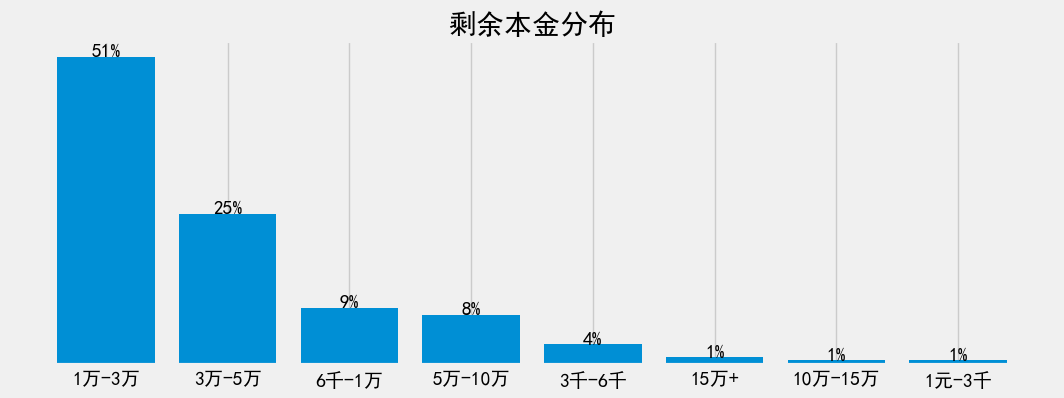

In [39]:
# 剩余本金分析
if '剩余本金' in list(data_copy_feature_new.columns):
    Remaining_Principal_V1(data_copy_feature_new)

        笔数  占比%
贷款日期           
2017  7260   21
2016  5475   16
2019  3721   11
2015  3311    9
2014  3259    9
2012  2563    7
2018  2470    7
2013  2410    7
2020  1384    4
2021   732    2
2011   659    1
2010    44    0
2022    28    0
1        1    0


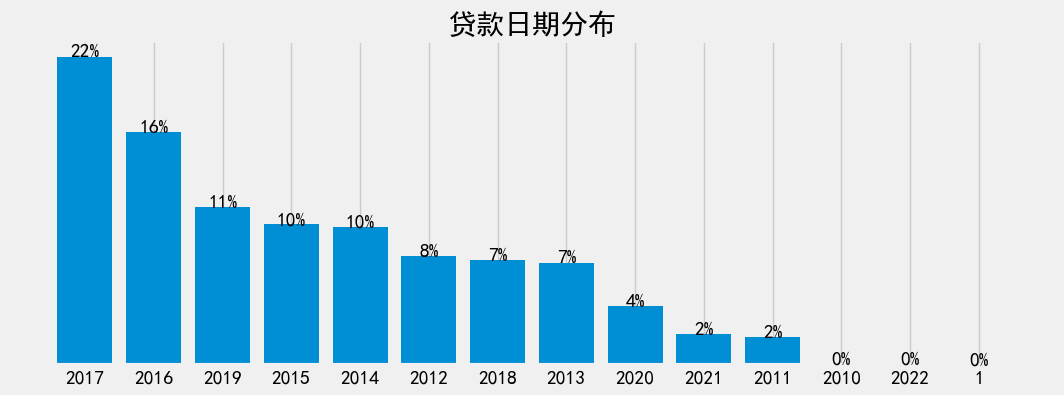

In [40]:
# 贷款日期 分析
if '贷款日期' in list(data_copy_feature_new.columns):
    Loan_Date_V1(data_copy_feature_new)

        逾期天数区间  占比%
逾期天数区间             
3年~6年    11870   35
1年~3年     7936   23
6年~9年     6524   19
9年~15年    3185    9
6~1年      2010    6
未逾期        497    1
0~1月       413    1
3~6月       395    1
1~2月       269    0
2~3月       217    0
15年+         1    0


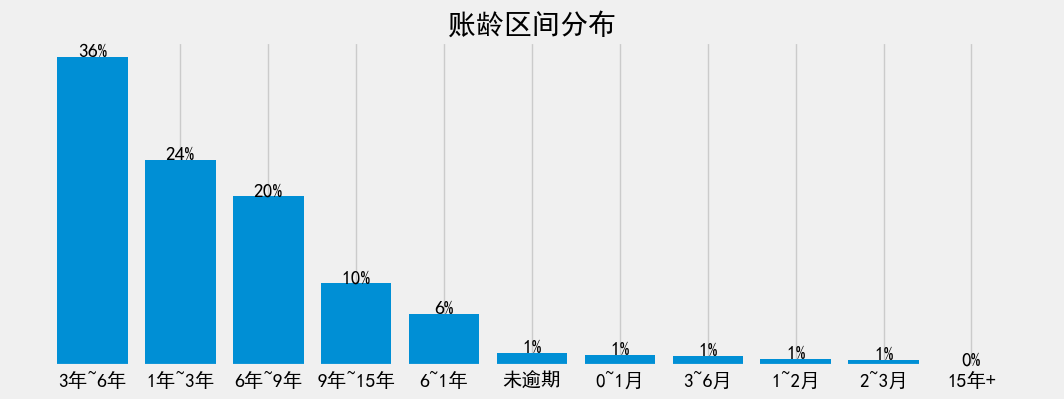

In [41]:
# 账龄分析 分析
if '逾期天数区间' in list(data_copy_feature_new.columns):
    Aging_V1(data_copy_feature_new)

         年龄区间  占比%
年龄区间              
30~40岁  13513   40
40~50岁   9400   28
50~60岁   4237   12
20岁下     3547   10
20~30岁   2110    6
60~70岁    507    1
70岁+        3    0


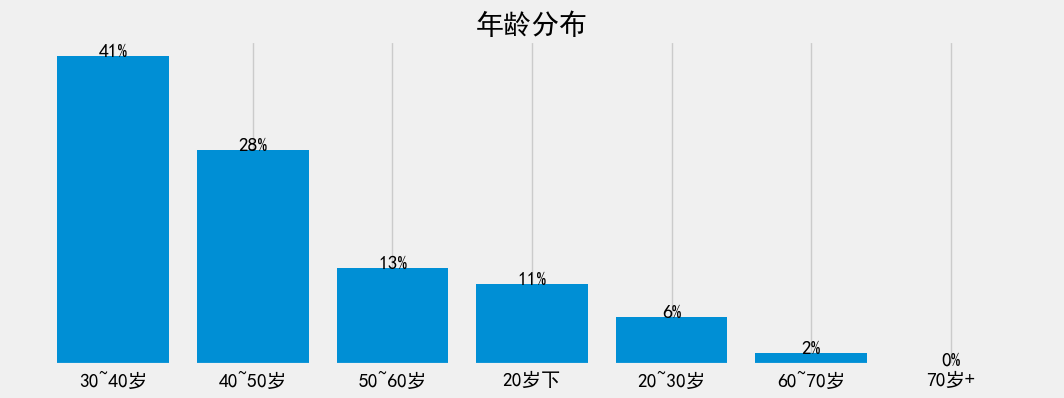

In [42]:
# 借款人年龄进行分区，并画出图像
if "年龄" in list(data_copy_feature_new.columns):
    age_V1(data_copy_feature_new)

       性别  占比%
性别            
男   28182   84
女    5135   15


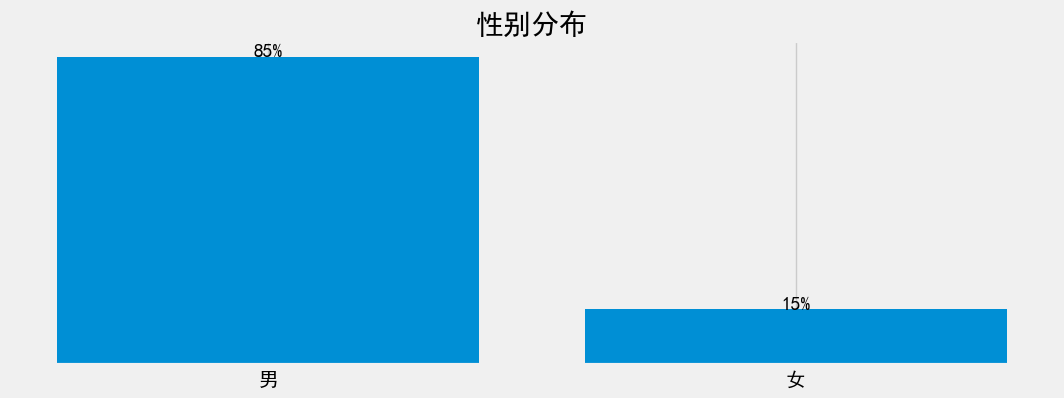

In [43]:
# 性别分析，并画出图像
if "性别" in list(data_copy_feature_new.columns):
    sex_V1(data_copy_feature_new)

       省份  占比%
省份            
广东省  8746   34
湖南   4596   18
广西   2977   11
湖北省  2739   10
四川省  1937    7
江西省  1742    6
河南省  1524    6
陕西省   653    2
云南省   468    1


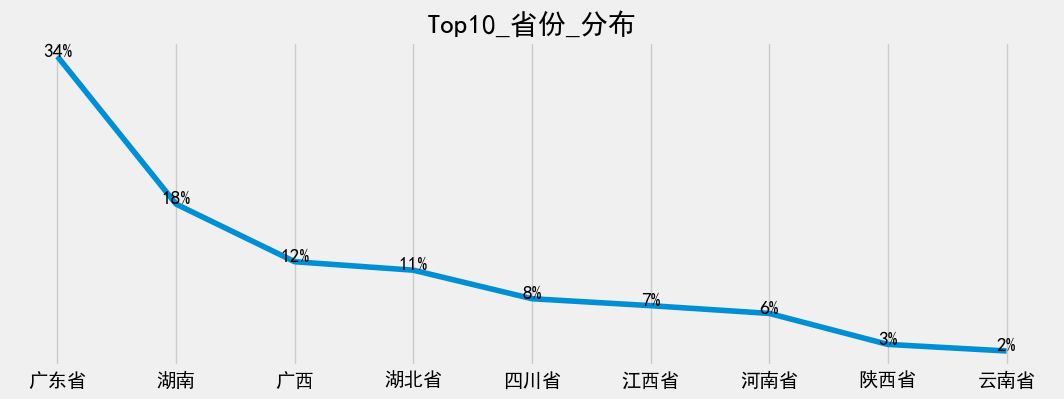

In [44]:
# 户籍省份，并画出图像
if "省份" in list(data_copy_feature_new.columns):
    province_V1(data_copy_feature_new)

In [45]:
# 学历分布，并画出图像
if "学历" in list(data_copy_feature_new.columns):
    school_V1(data_copy_feature_new)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().